In [18]:
# Load data from MySQL to perform exploratory data analysis
import settings2
import mysql.connector
import pandas as pd
import time

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl


db_connection = mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="iembd2019",
    database="TwitterDB",
    charset = 'utf8'
)

Facebook Negative Tweets Monitor: 
  2020-05-04 21:16:02  Adidas Crazy 98 BYW Micropacer Boost Basketball Shoes Mens Size 10.5 Silver | eBay https://t.co/rVjIYyI7Dj
  2020-05-04 21:19:56  I needing bad bitch  adidas ray  shawty the baddest


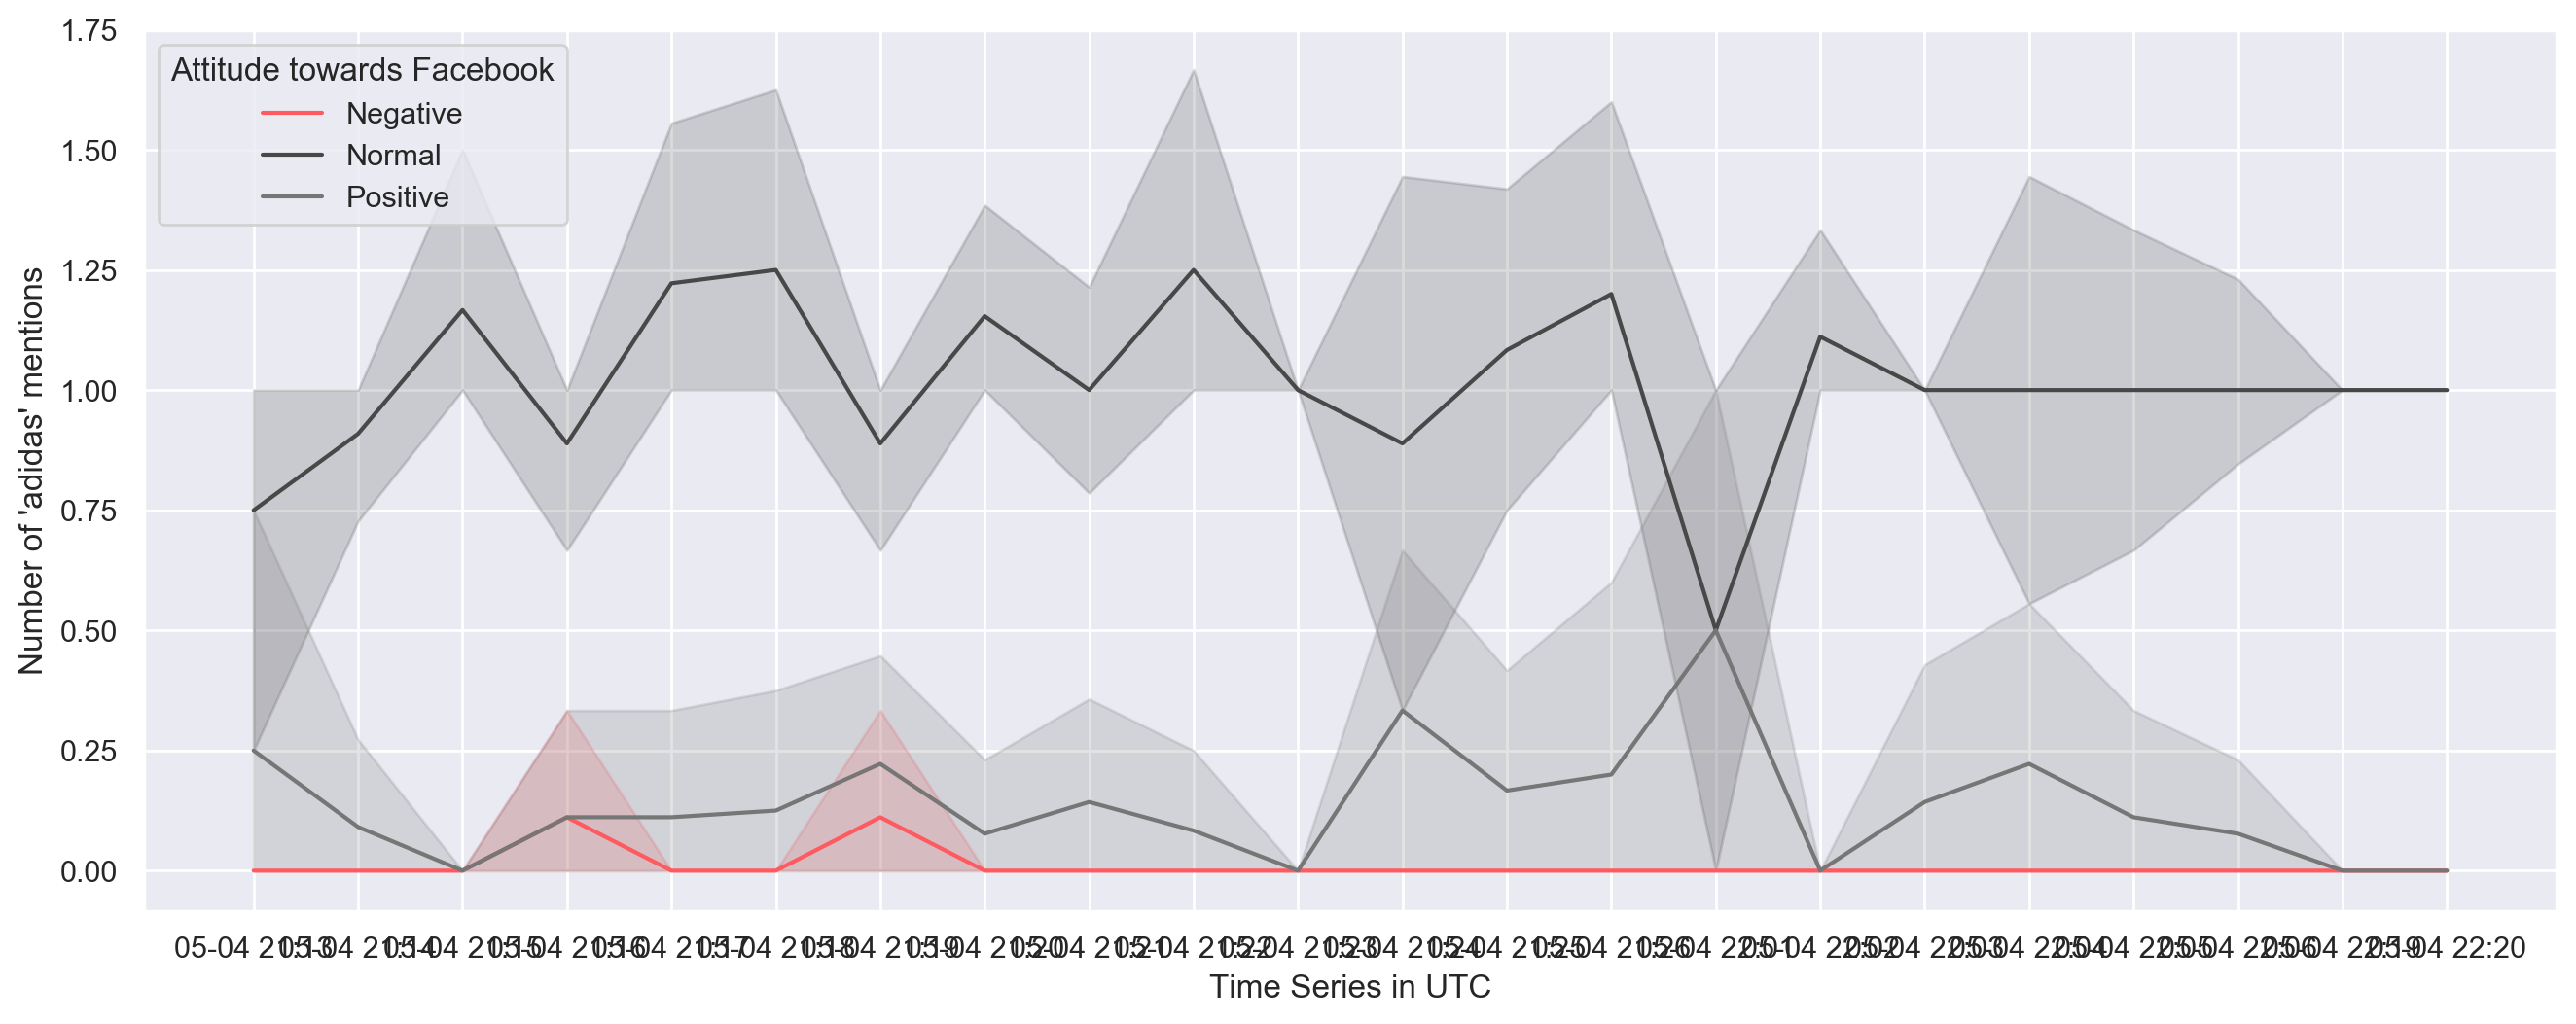

In [19]:
# Load data from MySQL
df = pd.read_sql('SELECT id_str, text, created_at, polarity, user_location FROM {}'.format(settings2.TABLE_NAME), con=db_connection)
# UTC for date time at default
df['created_at'] = pd.to_datetime(df['created_at'])
print("Facebook Negative Tweets Monitor: ")
for index, tweets in df[df['polarity'] == -1].iterrows():
    print("  " +str(tweets[2]) + "  " + tweets[1])


# Clean and transform data to enable time series
result = df.groupby([pd.Grouper(key='created_at', freq='2s'), 'polarity']).count() \
        .unstack(fill_value=0).stack().reset_index()
result['created_at'] = pd.to_datetime(result['created_at']).apply(lambda x: x.strftime('%m-%d %H:%M'))


# Plot Line Chart for monitoring brand awareness on Twitter
mpl.rcParams['figure.dpi']= 200
plt.figure(figsize=(16, 6))
sns.set(style="darkgrid")
ax = sns.lineplot(x = "created_at" ,y="id_str", hue='polarity', data=result,\
                  palette=sns.color_palette(["#FF5A5F","#484848", "#767676"]))
ax.set(xlabel='Time Series in UTC', ylabel="Number of '{}' mentions".format(settings2.TRACK_WORDS[0]))
plt.legend(title='Attitude towards Facebook', loc='upper left', labels=['Negative', 'Normal', 'Positive'])
sns.set(rc={"lines.linewidth": 1})
plt.show()


In [13]:
df.sample(100)

,id_str,text,created_at,polarity,user_location
9,1257418352080965633,Transferring to Lindblom my junior year for Wa...,2020-05-04 21:14:31,0,The Chi
93,1257420061893177346,RT @sugohaessoo: I love their Adidas outfits s...,2020-05-04 21:21:19,0,+62
48,1257419146654109696,RT @SneakerScouts: #ad The Pharrell x adidas S...,2020-05-04 21:17:40,1,None
150,1257421079049580545,Adidas order scheduled for delivery on my bday...,2020-05-04 21:25:21,0,"New Jersey, USA"
44,1257419062264684546,RT @Beyonce: Live on https://t.co/SDScvRTZ6p 1...,2020-05-04 21:17:20,0,0203 856 3787 Worldwide
...,...,...,...,...,...
81,1257419864546971651,RT @codybtapp: Adidas wasnt trying to miss twi...,2020-05-04 21:20:32,0,His name was Seth Rich.
159,1257421346361036803,adidas Yeezy Boost 350 V2 'Earth'\n- DSWT\n- S...,2020-05-04 21:26:25,0,"Northville, MI"
147,1257421050377273348,"RT @Kameron_Hay: Adidas fumbled Jordan, Kobe, ...",2020-05-04 21:25:14,0,safe haven
46,1257419082850320384,"RT @Kameron_Hay: Adidas fumbled Jordan, Kobe, ...",2020-05-04 21:17:25,0,None


In [26]:
# Next step: find out geo-distribution of users
# Find where tweets come from according to their users' location
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="specify_your_app_name_here")
location = geolocator.geocode("Columbus, Oh")
print((location.latitude, location.longitude))
location.address

GeocoderInsufficientPrivileges: HTTP Error 403: Forbidden